In [1]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns   
sns.set()

In [2]:
!pwd

/Users/katewessels/Documents/capstones/right_in_tune/notebooks


In [3]:
pd.set_option('display.max_columns', None)

In [242]:
#get validation data
json_file_path = "/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-valid/valid_examples.json"

with open(json_file_path, 'r') as j:
     contents_valid = json.loads(j.read())
    

In [243]:
df_valid = pd.DataFrame(contents_valid).T.reset_index()

In [245]:
df_valid = df_valid.drop(columns=['index'])

In [247]:
df_valid.to_csv('data/valid_metadata.csv', index=None)

In [248]:
df_valid = pd.read_csv('data/valid_metadata.csv')

In [250]:
#get test data
json_file_path = "/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-test/test_examples.json"

with open(json_file_path, 'r') as j:
     contents_test = json.loads(j.read())
    

In [251]:
df_test = pd.DataFrame(contents_test).T.reset_index()

In [252]:
df_test = df_test.drop(columns=['index'])

In [253]:
df_test.to_csv('data/test_metadata.csv', index=None)

In [254]:
df_test = pd.read_csv('data/test_metadata.csv')

In [4]:
json_file_path = "/Users/katewessels/Documents/capstones/right_in_tune/data/nsynth-train/train_examples.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

In [5]:
df = pd.DataFrame(contents).T.reset_index()

In [6]:
df.head()

,index,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
0,guitar_acoustic_001-082-050,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,bass_synthetic_120-108-050,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,organ_electronic_120-050-127,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,guitar_electronic_021-026-025,146382,16000,26,1,guitar,guitar_electronic_021,guitar_electronic_021-026-025,"[fast_decay, percussive]",electronic,25,3,346,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
4,organ_electronic_011-079-075,244275,16000,79,1,organ,organ_electronic_011,organ_electronic_011-079-075,[bright],electronic,75,6,188,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [7]:
df = df.drop(columns=['index'])

In [8]:

df.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
0,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,146382,16000,26,1,guitar,guitar_electronic_021,guitar_electronic_021-026-025,"[fast_decay, percussive]",electronic,25,3,346,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
4,244275,16000,79,1,organ,organ_electronic_011,organ_electronic_011-079-075,[bright],electronic,75,6,188,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289205 entries, 0 to 289204
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   note                   289205 non-null  object
 1   sample_rate            289205 non-null  object
 2   pitch                  289205 non-null  object
 3   instrument_source      289205 non-null  object
 4   instrument_family_str  289205 non-null  object
 5   instrument_str         289205 non-null  object
 6   note_str               289205 non-null  object
 7   qualities_str          289205 non-null  object
 8   instrument_source_str  289205 non-null  object
 9   velocity               289205 non-null  object
 10  instrument_family      289205 non-null  object
 11  instrument             289205 non-null  object
 12  qualities              289205 non-null  object
dtypes: object(13)
memory usage: 28.7+ MB


In [216]:
df.to_csv('data/training_metadata.csv', index=None)

In [217]:
df = pd.read_csv('data/training_metadata.csv')

In [10]:
df.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
0,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,146382,16000,26,1,guitar,guitar_electronic_021,guitar_electronic_021-026-025,"[fast_decay, percussive]",electronic,25,3,346,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
4,244275,16000,79,1,organ,organ_electronic_011,organ_electronic_011-079-075,[bright],electronic,75,6,188,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [11]:
df['instrument_family'].value_counts()


0     65474
4     51821
6     34477
5     34201
3     32690
8     19474
7     13911
1     12675
10    10208
2      8773
9      5501
Name: instrument_family, dtype: int64

In [16]:
instrument_value_counts = df['instrument_family'].value_counts()
instrument_value_counts[2]

8773

In [19]:
#set up class weights for weighting feature in keras to deal
#with class imbalance when fitting a CNN
#set smallest class weight to 1 and all others as a multiple of 
#smallest class
smallest_class = instrument_value_counts[9]
class_weight = {0:instrument_value_counts[0]/instrument_value_counts[9],
                1:instrument_value_counts[1]/instrument_value_counts[9],
                2:instrument_value_counts[2]/instrument_value_counts[9],
                3:instrument_value_counts[3]/instrument_value_counts[9],
                4:instrument_value_counts[4]/instrument_value_counts[9],
                5:instrument_value_counts[5]/instrument_value_counts[9],
                6:instrument_value_counts[6]/instrument_value_counts[9],
                7:instrument_value_counts[7]/instrument_value_counts[9],
                8:instrument_value_counts[8]/instrument_value_counts[9],
                9:instrument_value_counts[9]/instrument_value_counts[9],
                10:instrument_value_counts[10]/instrument_value_counts[9]
               }
class_weight

{0: 11.902199600072715,
 1: 2.3041265224504635,
 2: 1.594800945282676,
 3: 5.942555898927468,
 4: 9.420287220505363,
 5: 6.21723323032176,
 6: 6.267405926195237,
 7: 2.5288129431012543,
 8: 3.540083621159789,
 9: 1.0,
 10: 1.8556626067987638}

In [12]:
instrument_series = df['instrument_family_str'].value_counts()
instrument_series

bass          65474
keyboard      51821
organ         34477
mallet        34201
guitar        32690
string        19474
reed          13911
brass         12675
vocal         10208
flute          8773
synth_lead     5501
Name: instrument_family_str, dtype: int64

In [221]:
source_series = df['instrument_source_str'].value_counts()
source_series

electronic    104434
acoustic      102165
synthetic      82606
Name: instrument_source_str, dtype: int64

In [222]:
df['instrument_source'].value_counts()

1    104434
0    102165
2     82606
Name: instrument_source, dtype: int64

In [223]:
pitch_series = df['pitch'].value_counts()
pitch_series

60     4258
55     4252
62     4237
63     4221
61     4216
       ... 
116      20
118      20
113      19
120      19
119      18
Name: pitch, Length: 112, dtype: int64

''

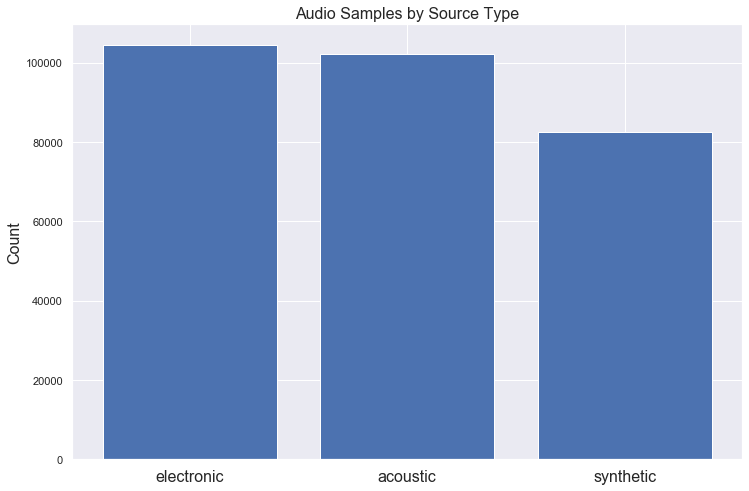

In [224]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(source_series.index, source_series.values)
ax.set_title('Audio Samples by Source Type', fontsize=16)
plt.xticks(fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.savefig('images/counts_by_source_type.png', bbox_inches='tight')
;



''

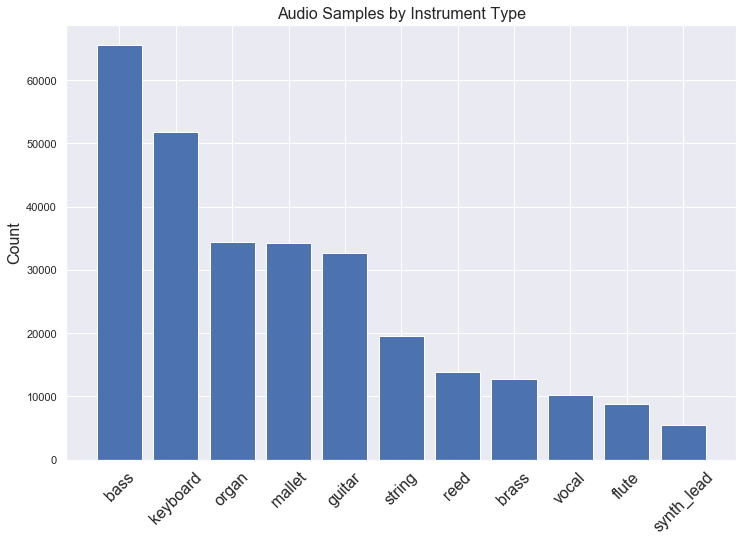

In [225]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(instrument_series.index, instrument_series.values)
ax.set_title('Audio Samples by Instrument Type', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
ax.set_ylabel('Count', fontsize=16)
plt.savefig('images/counts_by_instrument_type.png', bbox_inches='tight')
;


In [226]:
instrument_acoustic = df['instrument_family_str'][df['instrument_source_str']==
                    'acoustic'].value_counts().reindex(df['instrument_family_str'].unique(),
                        fill_value=0).sort_index()
instrument_acoustic

bass            200
brass         12605
flute          6362
guitar        11380
keyboard       8068
mallet        26857
organ           176
reed          13307
string        19390
synth_lead        0
vocal          3820
Name: instrument_family_str, dtype: int64

In [227]:
instrument_electronic = df['instrument_family_str'][df['instrument_source_str']
                        =='electronic'].value_counts().reindex(df['instrument_family_str'].unique(),
                        fill_value=0).sort_index()
instrument_electronic

bass           7757
brass            70
flute            35
guitar        16035
keyboard      40355
mallet         5581
organ         34301
reed             76
string           84
synth_lead        0
vocal           140
Name: instrument_family_str, dtype: int64

In [228]:
instrument_synthetic = df['instrument_family_str'][df['instrument_source_str']==
                        'synthetic'].value_counts().reindex(df['instrument_family_str'].unique(),
                        fill_value=0).sort_index()
instrument_synthetic



bass          57517
brass             0
flute          2376
guitar         5275
keyboard       3398
mallet         1763
organ             0
reed            528
string            0
synth_lead     5501
vocal          6248
Name: instrument_family_str, dtype: int64

In [229]:
instrument_acoustic.index

Index(['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ',
       'reed', 'string', 'synth_lead', 'vocal'],
      dtype='object')

In [230]:
instrument_acoustic.values

array([  200, 12605,  6362, 11380,  8068, 26857,   176, 13307, 19390,
           0,  3820])

In [231]:
instrument_electronic.values

array([ 7757,    70,    35, 16035, 40355,  5581, 34301,    76,    84,
           0,   140])

In [232]:
instrument_synthetic.values

array([57517,     0,  2376,  5275,  3398,  1763,     0,   528,     0,
        5501,  6248])

In [233]:
instrument_synthetic.index

Index(['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ',
       'reed', 'string', 'synth_lead', 'vocal'],
      dtype='object')

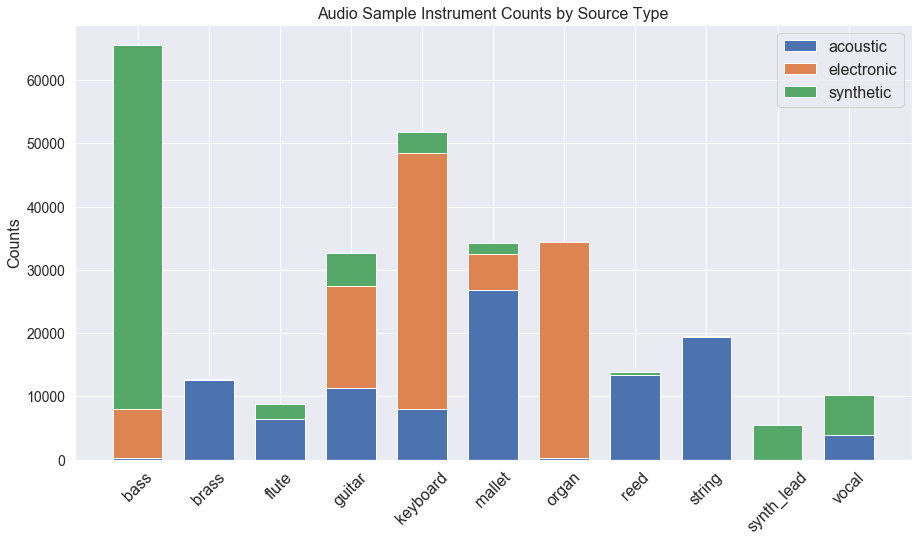

''

In [234]:
#stacked bar chart
labels = instrument_acoustic.index
acoustic = instrument_acoustic.values
electronic = instrument_electronic.values
synthetic = instrument_synthetic.values

width = 0.7       
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(labels, acoustic, width, label='acoustic')
ax.bar(labels, electronic, width, bottom=acoustic,
       label='electronic')
ax.bar(labels, synthetic, width, bottom=electronic+acoustic,
       label='synthetic')

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=14)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Audio Sample Instrument Counts by Source Type', fontsize=16)
ax.legend(fontsize=16)


plt.savefig('images/instrument_by_source.png', bbox_inches='tight')
plt.show()
;

''

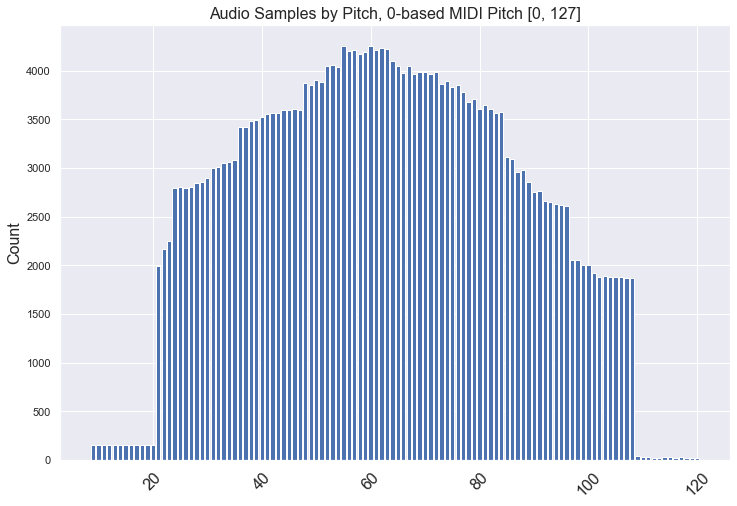

In [235]:
fig, ax = plt.subplots(figsize=(12,8))
# ax.hist(df['pitch'], bins=112)
ax.bar(pitch_series.index, pitch_series.values)
ax.set_title('Audio Samples by Pitch, 0-based MIDI Pitch [0, 127]', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
ax.set_ylabel('Count', fontsize=16)
plt.savefig('images/counts_by_pitch.png', bbox_inches='tight')
;


In [236]:
#  five different velocities (25, 50, 75, 100, 127)
velocity_series = df['velocity'].value_counts()
velocity_series

127    61197
100    57068
50     57030
75     57028
25     56882
Name: velocity, dtype: int64

''

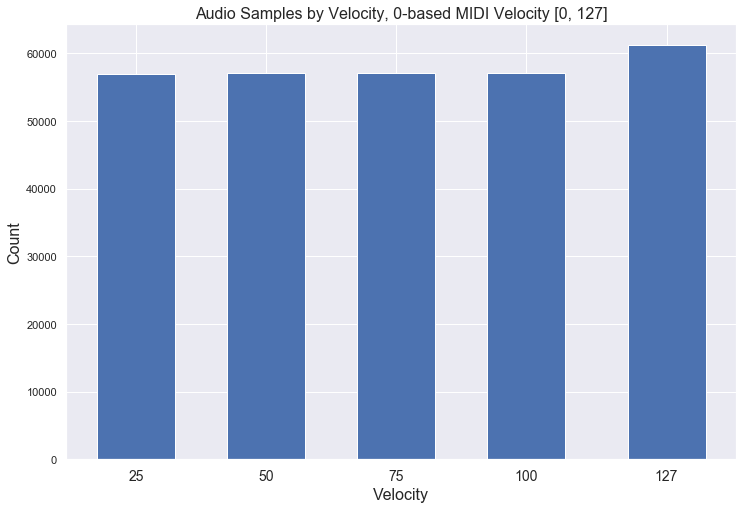

In [237]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(velocity_series.index, velocity_series.values, width=15)
ax.set_title('Audio Samples by Velocity, 0-based MIDI Velocity [0, 127]', fontsize=16)
plt.xticks([25, 50, 75, 100, 127], fontsize=14)
ax.set_xlabel('Velocity', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.savefig('images/counts_by_velocity.png', bbox_inches='tight')
;


''

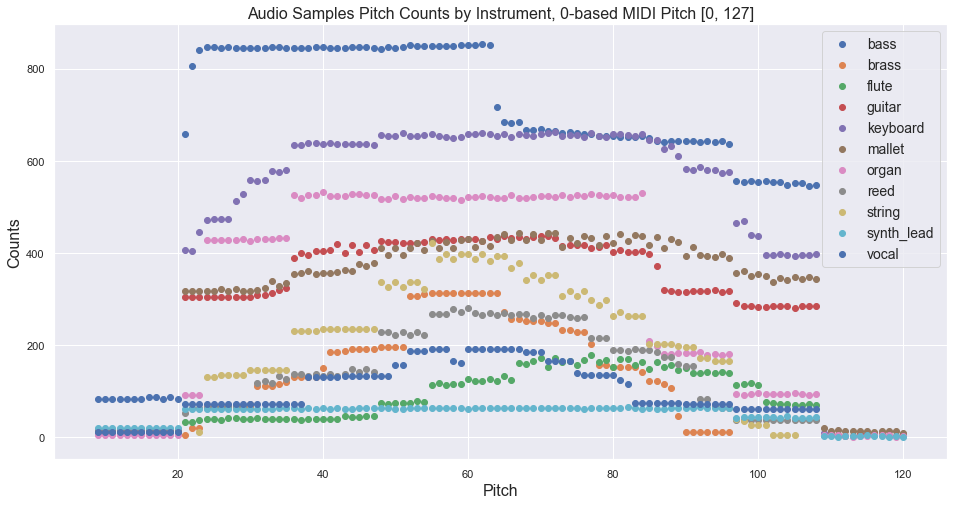

In [238]:
groups = df.groupby('instrument_family_str')
fig, ax = plt.subplots(figsize=(16,8))

for name, group in groups:
    ax.scatter(group['pitch'].value_counts().index, group['pitch'].value_counts().values, label=name)

ax.set_xlabel("Pitch", fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Audio Samples Pitch Counts by Instrument, 0-based MIDI Pitch [0, 127]', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('images/scatter_pitch_by_instrument.png', bbox_inches='tight')
;


In [239]:
#box plot function
def box_plot(list_of_lists, title, x_tick_label_list, y_label, ax):
    ax.boxplot(list_of_lists)
#     ax.set_xticks([1, 2])
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(x_tick_label_list, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=16, rotation=45)
    plt.savefig(f'images/{y_label}_boxplot.png', bbox_inches='tight')

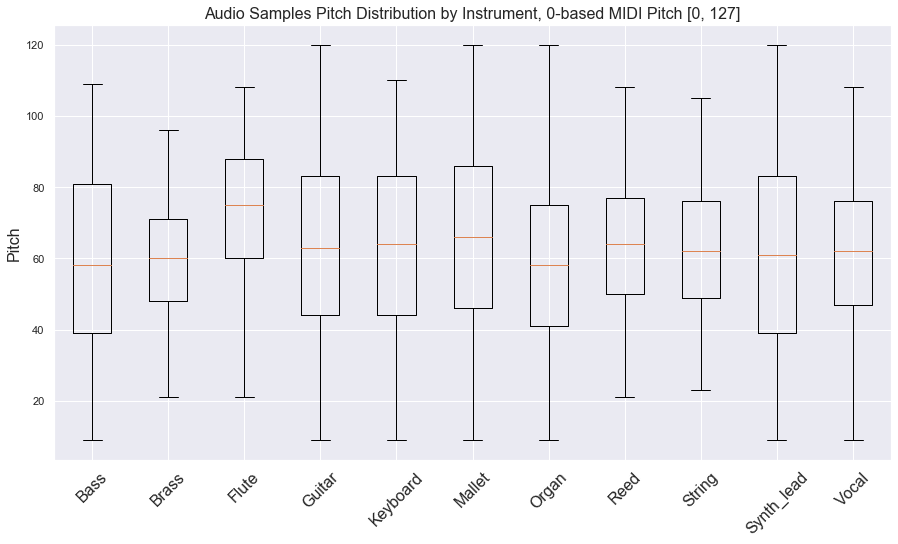

''

In [240]:
fig, ax = plt.subplots(figsize=(15,8))
list_of_lists = [list(df[df['instrument_family_str']=='bass']['pitch']), 
                 list(df[df['instrument_family_str']=='brass']['pitch']),
                list(df[df['instrument_family_str']=='flute']['pitch']),
                list(df[df['instrument_family_str']=='guitar']['pitch']),
                 list(df[df['instrument_family_str']=='keyboard']['pitch']),
                 list(df[df['instrument_family_str']=='mallet']['pitch']),
                 list(df[df['instrument_family_str']=='organ']['pitch']),
                 list(df[df['instrument_family_str']=='reed']['pitch']),
                 list(df[df['instrument_family_str']=='string']['pitch']),
                 list(df[df['instrument_family_str']=='synth_lead']['pitch']),
                 list(df[df['instrument_family_str']=='vocal']['pitch'])
                ]
x_tick_label_list = ['Bass', 'Brass', 'Flute', 'Guitar', 'Keyboard',
                    'Mallet', 'Organ', 'Reed', 'String', 'Synth_lead', 'Vocal']
box_plot(list_of_lists, 'Audio Samples Pitch Distribution by Instrument, 0-based MIDI Pitch [0, 127]', 
         x_tick_label_list, 'Pitch', ax=ax)
plt.show()
;

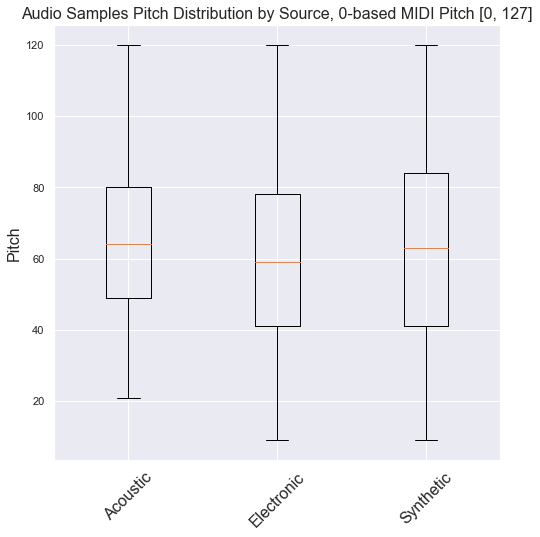

''

In [241]:
fig, ax = plt.subplots(figsize=(8,8))
list_of_lists = [list(df[df['instrument_source_str']=='acoustic']['pitch']), 
                 list(df[df['instrument_source_str']=='electronic']['pitch']),
                list(df[df['instrument_source_str']=='synthetic']['pitch'])
                ]
x_tick_label_list = ['Acoustic', 'Electronic', 'Synthetic']
box_plot(list_of_lists, 'Audio Samples Pitch Distribution by Source, 0-based MIDI Pitch [0, 127]', 
         x_tick_label_list, 'Pitch', ax=ax)
plt.show()
;